<a href="https://colab.research.google.com/github/francomanca93/fundamentos-de-estadistica-con-python/blob/estadistica-analitica/4.%20Construir%20conceptos%20estad%C3%ADsticos%20anal%C3%ADticos/11_Estimadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimadores a través de datos

Como generar inferencias a través de una muestra. Para ello recordemos:

Una población o una variable aleatoria que viene de una población puede ser muestreada y calculada utilizando una pequeña porción de la misma. Sobre la muestra quisieramos encontrar algunos parametros poblacionales que la describan perfectamente. Recordemos una variable aleatoria normal que puede ser descripta con la media (µ) y su desviación estandar (σ), esto se simboliza --> N(µ, σ). 

![estimadores](https://imgur.com/yJm64Pu.png)

![inferencia](https://imgur.com/qIHAqpA.png)

Lo que queremos es inferir o extraer una conclusión de la población a través de la muestra tomada de la población y obteniendo sus parámetros descriptivos. 

A partir de lo dicho, queremos encontrar los mejores estimadores de los parámetros poblaciones, ¿cuales serán estos? Para saber esto debemos saber que es un [estimador](https://es.wikipedia.org/wiki/Estimador).

![difinicion_estimadores](https://imgur.com/uSBdOA8.png)


En estadística, un **estimador** es un estadístico (esto es, una función de la muestra) usado para estimar un parámetro desconocido de la población.

Por ejemplo, si se desea conocer el precio medio de un artículo (el parámetro desconocido) se recogerán observaciones del precio de dicho artículo en diversos establecimientos (la muestra) y la media aritmética de las observaciones puede utilizarse como estimador del precio medio. 

Para cada parámetro pueden existir varios estimadores diferentes. En general, escogeremos el estimador que posea mejores propiedades que los restantes, como insesgadez, eficiencia, convergencia y robustez (consistencia). 



El valor de un estimador proporciona lo que se denomina en estadística una estimación puntual del valor del parámetro en estudio. En general, se suele preferir realizar una estimación mediante un intervalo, esto es, obtener un intervalo [a,b] dentro del cual se espera esté el valor real del parámetro con un cierto nivel de confianza. Utilizar un intervalo resulta más informativo, al proporcionar información sobre el posible error de estimación, asociado con la amplitud de dicho intervalo. El nivel de confianza es la probabilidad de que a priori el verdadero valor del parámetro quede contenido en el intervalo. 

En la práctica, los intervalos de estimadores con distribuciones simétricas suelen indicarse dando el valor del estimador puntual utilizado como centro del intervalo y un valor que debe sumarse y restarse para obtener el límite superior e inferior; por ejemplo: 

![intervalo](https://imgur.com/Mhz7SGc.png)

Y esto es lo que harémos, no en un intervalo, pero si dos hipotesis con distribución normal, diferentes medias y una misma desviación estandar.




In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vamos a simular que tomamos una muestra de tamaño 1. La muestra tuvo un valor de 3. Al no conocer los parametros poblacionales de la distribucion, vamos a generar una serie de hipotesis. 

Supongamos tener dos medias y calculemos la probabilidad de obtener la muestra bajo la hipotesis de los parametros poblacionales (las dos medias). 

In [ ]:
from scipy.stats import norm

x1 = 3

#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma)


print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

La probabilidad de obtener  3  en una muestra con una media  4  y desviacion de  1  es  0.24197072451914337
La probabilidad de obtener  3  en una muestra con una media  7  y desviacion de  1  es  0.00013383022576488537


Queremos ver la probabilidad conjunta de que ocurran dos casos x1 y x2.

In [ ]:
from scipy.stats import norm

x1 = 3
x2 = 10


#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma) * norm.pdf(x2, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma) * norm.pdf(x2, mu2, sigma)

print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

La probabilidad de obtener  3 y  10  en una muestra con una media  4  y desviacion de  1  es  1.4701857752651781e-09
La probabilidad de obtener  3 y  10  en una muestra con una media  7  y desviacion de  1  es  5.931152735254122e-07


Obtegamos valores aleatorias de la muestra

In [ ]:
mu = 5
sigma = 1

muestra_10 = norm.rvs(mu, sigma, size = 10)
muestra_10

array([4.02169712, 6.59586712, 4.94315465, 3.71712275, 5.76897145,
       3.92159233, 5.54808546, 4.60292048, 4.86351736, 4.78058325])

In [ ]:
#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1

data_1 = norm.rvs(mu1, sigma, size=100000)
data_2 = norm.rvs(mu2, sigma, size=100000)

In [ ]:
muestra_10
y = list([])

for i in range(len(muestra_10)):
  y.append(3000)

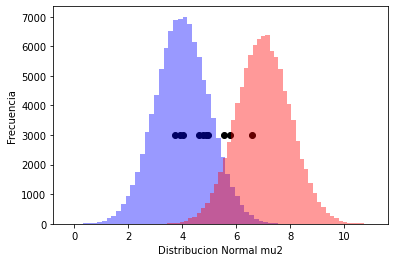

In [ ]:
ax = sns.distplot(data_1, bins = 50, color = 'blue', kde = False)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(data_2, bins = 50, color = 'red', kde = False)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

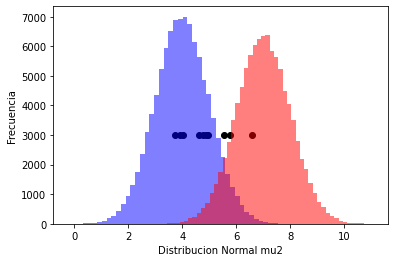

In [ ]:
fig, ax = plt.subplots()

ax.hist(data_1, bins = 50, color = 'blue', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax.hist(data_2, bins = 50, color = 'red', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

Con esto podemos ver como la muestra de 10 elementos puede pertencer con mayor probabilidad a una hipotesis respecto a la otra.

La primer hipotesis en la de color azul y la segunda hipotesis de color rojo. Los puntos obtenidos de forma aleatoria fueron graficados todos a una misma altura y podemos observar que se encuentran la mayoria dentro de la primer hipotesis.

## Estimadores de máxima verosimilitud

En estadística, la [estimación por máxima verosimilitud](https://es.wikipedia.org/wiki/M%C3%A1xima_verosimilitud) (conocida también como EMV y, en ocasiones, MLE por sus siglas en inglés) es un método habitual para ajustar un modelo y estimar sus parámetros. 

![emv](https://imgur.com/L8T0To0.png)
![pasos](https://imgur.com/KLUOFLh.png)

1. El método de máxima verosimilitud consiste en obtener el valor de lambda donde la **L(lambda) sea máximo**.

2. L(lambda) es la **función de máxima verosimilitud**, y está definida como el producto entre todos los valores de la muestra aleatoria evaluados en su función de densidad.

3. En este caso la distribución a estudiar es una exponencial, esto es importante, porque TODA distribución exponencial tiene función de densidad = **parametro * e^(parametro * x)** , entonces ya tenemos una función con que trabajar.


3. Se desarrolla la función para después aplicar Logaritmo natural.

4. **Por qué logaritmo natural?** Por dos razones, una tiene que ver con lo práctico de utilizar logaritmos en términos operatorios, pero la mas importante es que, dadas las propiedades de los logaritmos, **la función L(lambda) es máxima en el mismo punto que Ln(L(lambda)).**

![paso1](https://imgur.com/ZSpHbt1.png)

5. Se desarrolla la nueva función que se simplifica gracias a las propiedades de los logaritmos.

![paso2](https://imgur.com/fBgsk3C.png)

6. **Por qué se deriva y se iguala a cero?** recuerden que la primera derivada hace referencia a la pendiente de la función, y si la pendiente es cero significa que estamos en presencia de un mínimo o un máximo.

7. Para poder asegurar que ese valor de lambda es máximo, se debe derivar por segunda vez, si la segunda derivada es < 0 entonces estamos frente a un máximo, no se puede asegurar nada sin hacer este análisis.

8. Sorpresa! el estimador de max verosimilitud de una función es el promedio muestral.

![](https://imgur.com/GygKSzA.png)


![mejores_estimadores](https://imgur.com/Jn19XI6.png)